In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [27]:
sns.set_style("darkgrid")
# name of datasets that are present in seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [29]:
## load iris dataset
data = sns.load_dataset("iris")

In [31]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
data.shape

(150, 5)

In [35]:
## count the species present in species column
data["species"].value_counts(dropna=False)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0, 0.5, 'sepal_width')

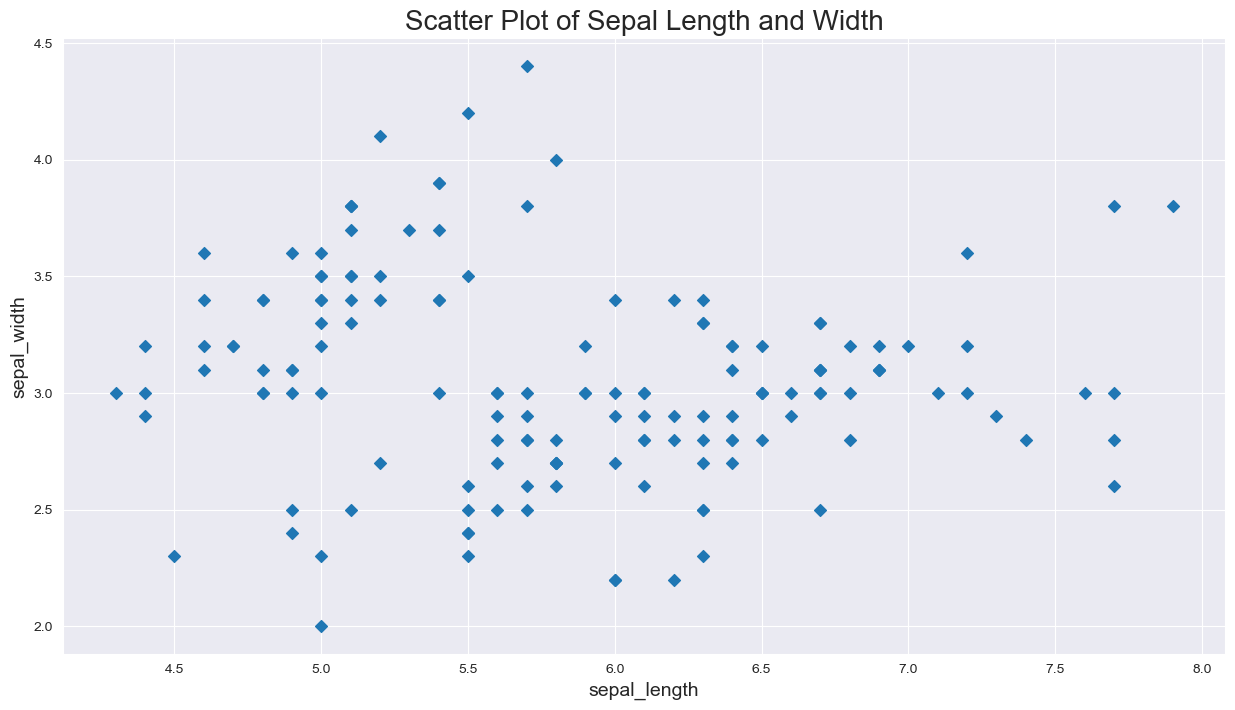

In [41]:
plt.figure(figsize=(15,8))  #local
plt.scatter(data["sepal_length"] , data["sepal_width"] , marker="D")
plt.title(label = "Scatter Plot of Sepal Length and Width",fontsize=20)
plt.xlabel(xlabel="sepal_length",fontsize=14)
plt.ylabel(ylabel="sepal_width",fontsize=14)

Text(0, 0.5, 'petal_width')

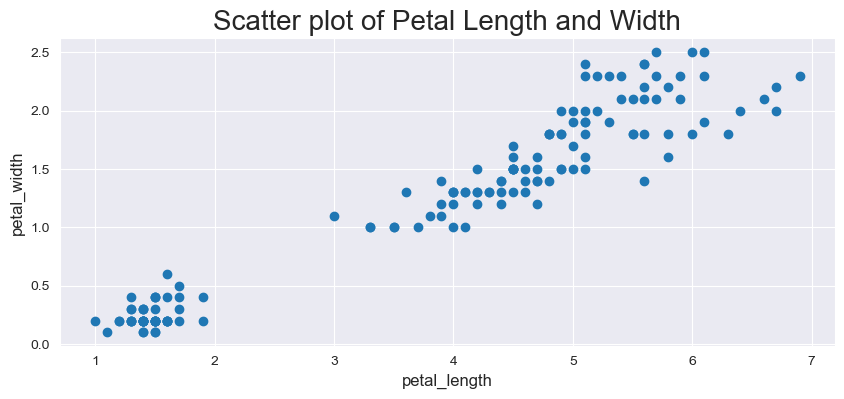

In [43]:
plt.figure(figsize=(10,4))
plt.scatter(data["petal_length"] , data["petal_width"] , marker="o")
plt.title(label="Scatter plot of Petal Length and Width", fontsize=20)
plt.xlabel(xlabel="petal_length",fontsize=12)
plt.ylabel(ylabel="petal_width",fontsize=12)

In [45]:
## checking the null values 
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [47]:
#converting categorical value of species column to numerical thrugh one hot encoding
data["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
#categorical to numerical
def map_species(f):
    if f == "setosa":
        return 0
    elif f == "versicolor":
        return 1
    elif f == "virginica":
        return 2
    else:
        return f

#assigning the converted values to species column 
data["species"] = data["species"].map(map_species)

In [51]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
data.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [55]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


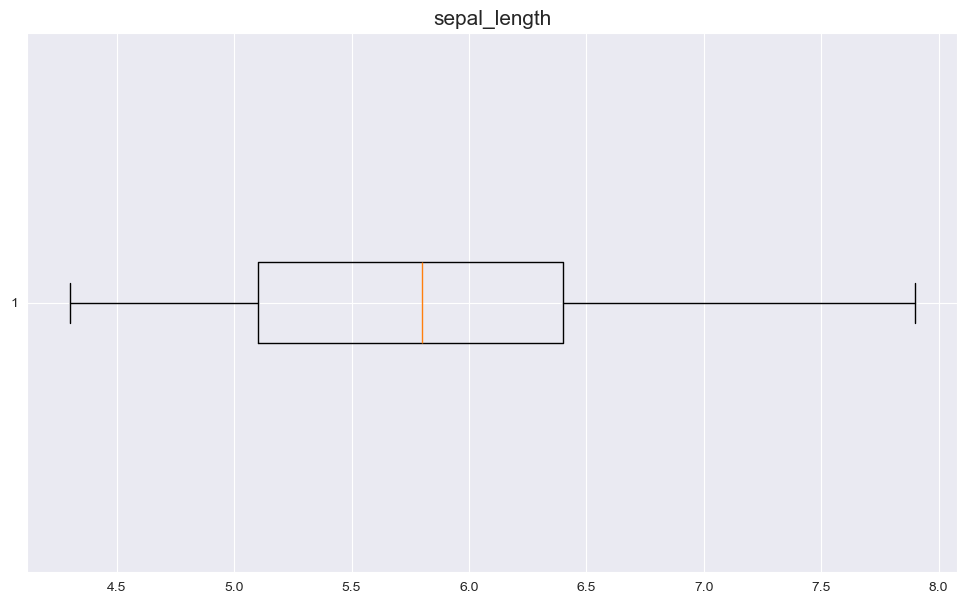

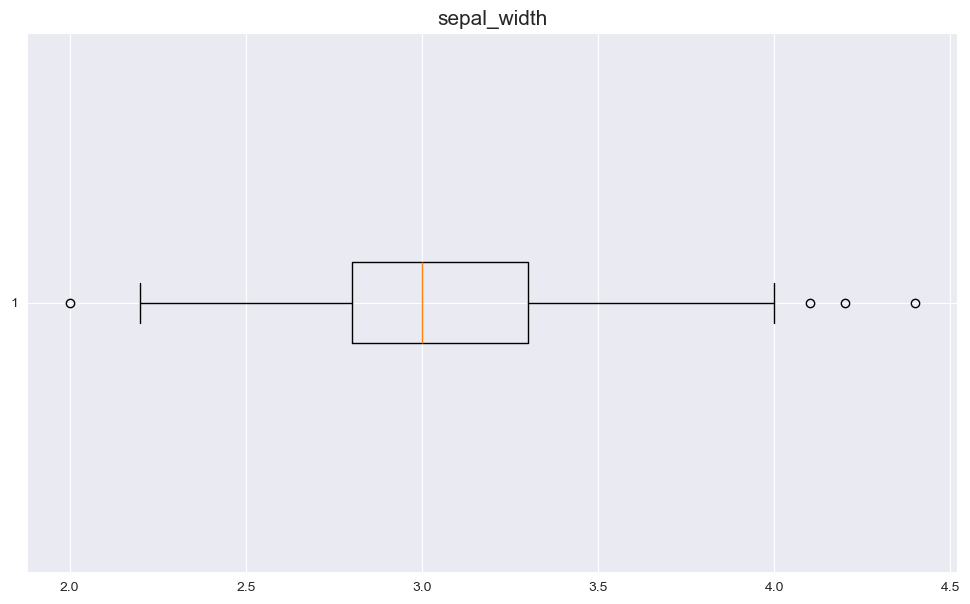

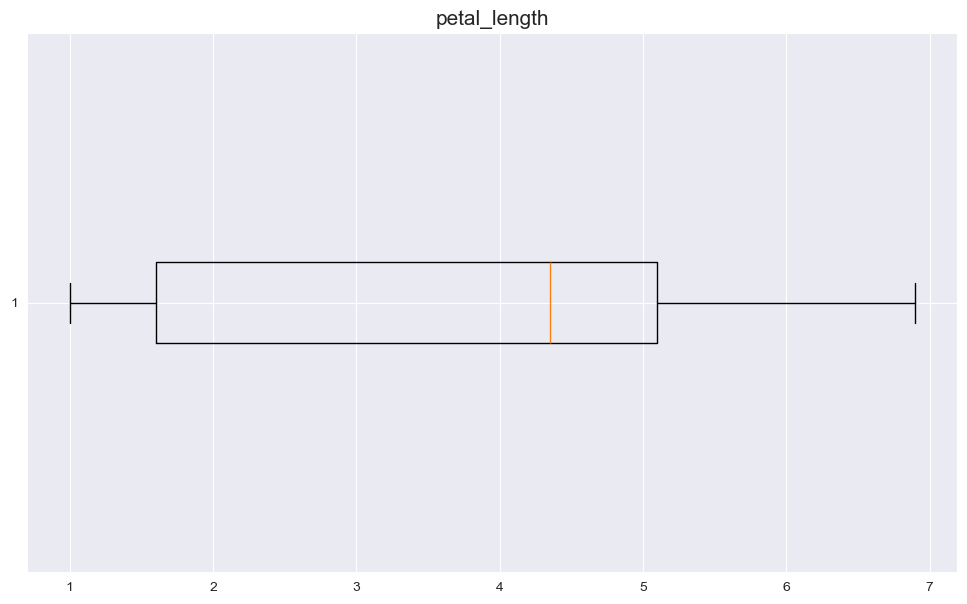

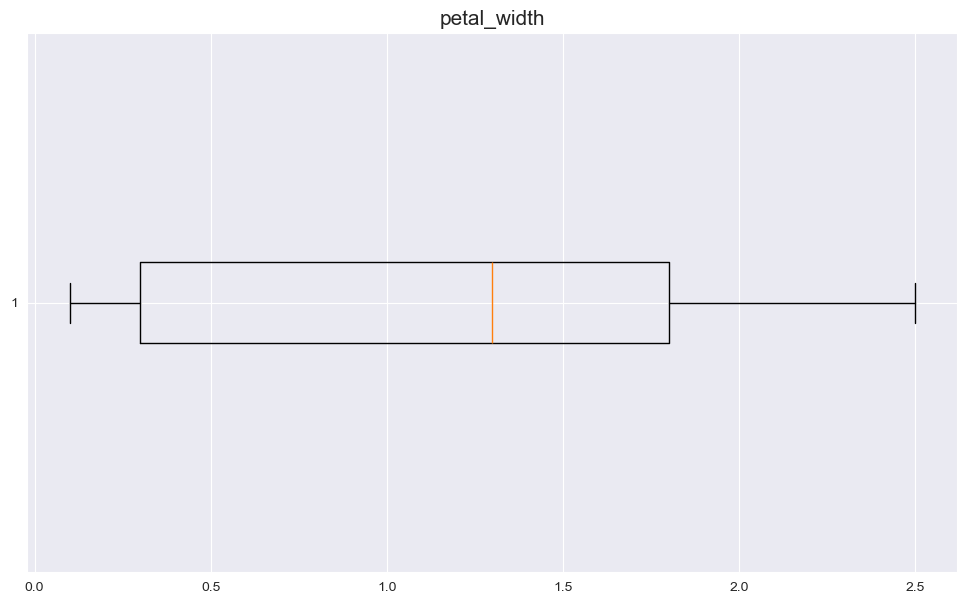

In [75]:
for f in ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]:
    plt.figure(figsize=(12,7))
    plt.boxplot(data[f] , vert = False)
    plt.title(f , fontsize=15)

In [79]:
# USING ML METHODS
#independent and dependent features
x = data.iloc[: :-1].values
y = data.iloc[: , -1].values
print(x)
print(y)

[[5.9 3.  5.1 1.8 2. ]
 [6.2 3.4 5.4 2.3 2. ]
 [6.5 3.  5.2 2.  2. ]
 [6.3 2.5 5.  1.9 2. ]
 [6.7 3.  5.2 2.3 2. ]
 [6.7 3.3 5.7 2.5 2. ]
 [6.8 3.2 5.9 2.3 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.9 3.1 5.1 2.3 2. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.9 3.1 5.4 2.1 2. ]
 [6.  3.  4.8 1.8 2. ]
 [6.4 3.1 5.5 1.8 2. ]
 [6.3 3.4 5.6 2.4 2. ]
 [7.7 3.  6.1 2.3 2. ]
 [6.1 2.6 5.6 1.4 2. ]
 [6.3 2.8 5.1 1.5 2. ]
 [6.4 2.8 5.6 2.2 2. ]
 [7.9 3.8 6.4 2.  2. ]
 [7.4 2.8 6.1 1.9 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [6.4 2.8 5.6 2.1 2. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.2 2.8 4.8 1.8 2. ]
 [7.2 3.2 6.  1.8 2. ]
 [6.7 3.3 5.7 2.1 2. ]
 [6.3 2.7 4.9 1.8 2. ]
 [7.7 2.8 6.7 2.  2. ]
 [5.6 2.8 4.9 2.  2. ]
 [6.9 3.2 5.7 2.3 2. ]
 [6.  2.2 5.  1.5 2. ]
 [7.7 2.6 6.9 2.3 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [6.5 3.  5.5 1.8 2. ]
 [6.4 3.2 5.3 2.3 2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [5.7 2.5 5.  2.  2. ]
 [6.8 3.  5.5 2.1 2. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.5 3.2 5.1 2.  2. ]
 [7.2 3.6 6.1 2.5 2. ]
 [6.7 2.5 5.8 1.8 2. ]
 [7.3 2.9 6.3 1.8 2. ]
 [4.9 2.5 4

In [117]:
#standardizing features
sc = StandardScaler()
X = sc.fit_transform(x)

In [119]:
#splitting features and output into test and train datas
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=32)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape )

(112, 5) (112,)
(38, 5) (38,)


In [121]:
lg = LogisticRegression()
lg.fit(x_train , y_train)
y_pred = lg.predict(x_test)


------------------------------------------Accuracy Score------------------------------------------
1.0
------------------------------------------Confusion Matrix------------------------------------------
[[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]
------------------------------------------Confusion Matrix With Annotation------------------------------------------


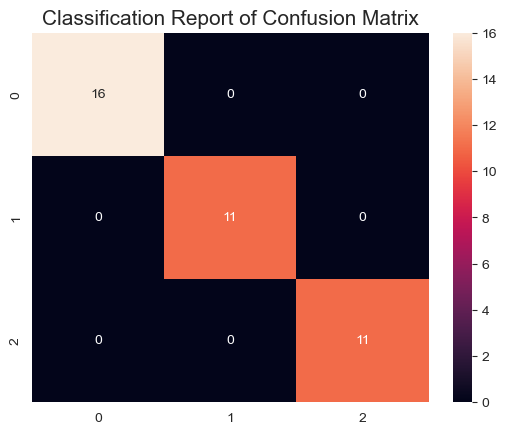

In [179]:
print("------------------------------------------Accuracy Score------------------------------------------")
print(accuracy_score(y_test , y_pred))
print("------------------------------------------Confusion Matrix------------------------------------------")
print(confusion_matrix(y_test , y_pred))
print("------------------------------------------Confusion Matrix With Annotation------------------------------------------")
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True)
plt.title(label="Classification Report of Confusion Matrix" , fontsize=15)
plt.show()

In [169]:
print("------------------------------------------Classification Report------------------------------------------")
print(classification_report(y_test , y_pred))

------------------------------------------Classification Report------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [171]:
print("------------------------------------------Classification Report With Annotation------------------------------------------")
# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)
print(report)
#convert keys into columns and values into rows using dataframe
report_tf = pd.DataFrame(report)
print(report_tf)
#take the transpose to interchange rows and columns
report_pf = report_tf.transpose()
print(report_pf)

------------------------------------------Classification Report With Annotation------------------------------------------
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 38.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 38.0}}
              0     1     2  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    16.0  11.0  11.0       1.0       38.0          38.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     16.0
1                   1.0     1.0       1.0     11.0
2  

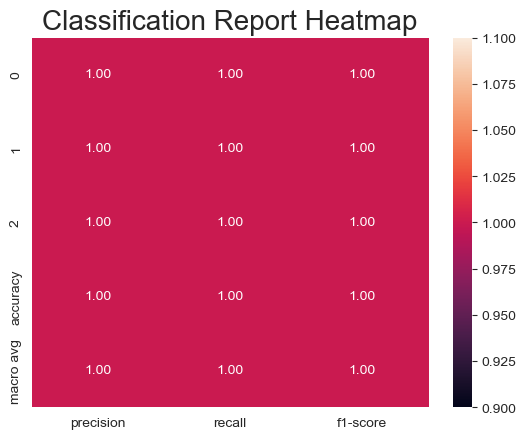

In [173]:
#apply heat map for plotting
sns.heatmap(report_pf.iloc[:-1 , :-1] , annot=True , fmt=".2f" , cbar=True)
plt.title(label="Classification Report Heatmap",fontsize=20)
plt.show()